<a href="https://colab.research.google.com/github/bmontoyag/UTEC_IA_Fundamentals/blob/main/practica_2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

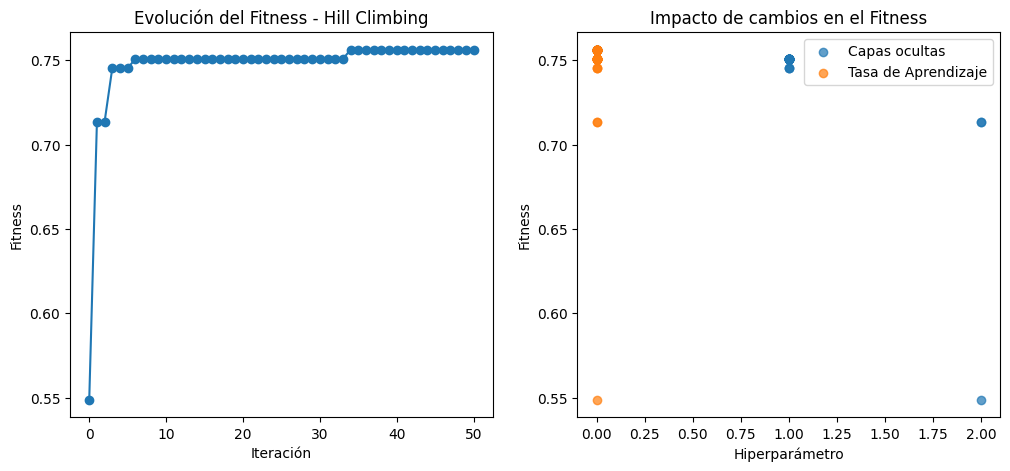

Primera solución aleatoria: Unidades 74, LR 0.0018622347282233691, Activación relu, Capas 2, Fitness 0.5488
Mejor configuración con Hill Climbing: Unidades 41, LR 0.0027143775482073337, Activación relu, Capas 0, Fitness 0.7562


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import time

# Cargar datos MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# Función de evaluación del modelo con múltiples criterios
def evaluate_model(hidden_units, learning_rate, activation, layers):
    model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))])

    for _ in range(layers):
        model.add(keras.layers.Dense(hidden_units, activation=activation))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    model.fit(x_train, y_train, epochs=5, verbose=0)
    train_time = time.time() - start_time

    loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
    fitness = accuracy - (0.01 * train_time)  # Penalización por tiempo excesivo

    return fitness, accuracy, loss, train_time

# Hill Climbing - Inicialización
iterations = 50
best_units = np.random.randint(50, 200)
best_lr = np.random.uniform(0.001, 0.01)
best_activation = np.random.choice(['relu', 'sigmoid', 'tanh'])
best_layers = np.random.randint(1, 4)
best_fitness, best_accuracy, best_loss, best_train_time = evaluate_model(best_units, best_lr, best_activation, best_layers)

fitness_scores = [best_fitness]
unit_changes = [best_units]
lr_changes = [best_lr]
activation_choices = [best_activation]
layer_counts = [best_layers]

for i in range(iterations):
    new_units = best_units + np.random.randint(-20, 20)
    new_lr = best_lr + np.random.uniform(-0.002, 0.002)
    new_activation = np.random.choice(['relu', 'sigmoid', 'tanh'])
    new_layers = best_layers + np.random.randint(-1, 2)

    new_fitness, new_accuracy, new_loss, new_train_time = evaluate_model(new_units, new_lr, new_activation, new_layers)

    if new_fitness > best_fitness:
        best_units, best_lr, best_activation, best_layers, best_fitness = new_units, new_lr, new_activation, new_layers, new_fitness

    fitness_scores.append(best_fitness)
    unit_changes.append(best_units)
    lr_changes.append(best_lr)
    activation_choices.append(best_activation)
    layer_counts.append(best_layers)

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(iterations + 1), fitness_scores, marker='o', linestyle='-')
plt.xlabel("Iteración")
plt.ylabel("Fitness")
plt.title("Evolución del Fitness - Hill Climbing")

plt.subplot(1, 2, 2)
plt.scatter(layer_counts, fitness_scores, label="Capas ocultas", alpha=0.7)
plt.scatter(lr_changes, fitness_scores, label="Tasa de Aprendizaje", alpha=0.7)
plt.xlabel("Hiperparámetro")
plt.ylabel("Fitness")
plt.legend()
plt.title("Impacto de cambios en el Fitness")

plt.show()

print(f"Primera solución aleatoria: Unidades {unit_changes[0]}, LR {lr_changes[0]}, Activación {activation_choices[0]}, Capas {layer_counts[0]}, Fitness {fitness_scores[0]:.4f}")
print(f"Mejor configuración con Hill Climbing: Unidades {best_units}, LR {best_lr}, Activación {best_activation}, Capas {best_layers}, Fitness {best_fitness:.4f}")

In [ ]:
import math

# Simulated Annealing - Inicialización
T = 1.0
cooling_rate = 0.9
iterations = 50

init_units = np.random.randint(50, 200)
init_lr = np.random.uniform(0.001, 0.01)
init_activation = np.random.choice(['relu', 'sigmoid', 'tanh'])
init_layers = np.random.randint(1, 4)
init_fitness, init_accuracy, init_loss, init_train_time = evaluate_model(init_units, init_lr, init_activation, init_layers)

current_units, current_lr, current_activation, current_layers, current_fitness = init_units, init_lr, init_activation, init_layers, init_fitness

fitness_scores = [init_fitness]
unit_changes = [init_units]
lr_changes = [init_lr]
activation_choices = [init_activation]
layer_counts = [init_layers]
temperatures = [T]

for i in range(iterations):
    new_units = current_units + np.random.randint(-40, 40)  # Cambios más grandes inicialmente
    new_lr = current_lr + np.random.uniform(-0.004, 0.004)
    new_activation = np.random.choice(['relu', 'sigmoid', 'tanh'])
    new_layers = current_layers + np.random.randint(-1, 2)

    new_fitness, new_accuracy, new_loss, new_train_time = evaluate_model(new_units, new_lr, new_activation, new_layers)

    delta = new_fitness - current_fitness
    if delta > 0 or np.exp(delta / T) > np.random.rand():
        current_units, current_lr, current_activation, current_layers, current_fitness = new_units, new_lr, new_activation, new_layers, new_fitness

    T *= cooling_rate

    fitness_scores.append(current_fitness)
    unit_changes.append(current_units)
    lr_changes.append(current_lr)
    activation_choices.append(current_activation)
    layer_counts.append(current_layers)
    temperatures.append(T)

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(iterations + 1), fitness_scores, marker='o', linestyle='-')
plt.xlabel("Iteración")
plt.ylabel("Fitness")
plt.title("Evolución del Fitness - Simulated Annealing")

plt.subplot(1, 2, 2)
plt.plot(range(iterations + 1), temperatures, marker='o', linestyle='-', color='red')
plt.xlabel("Iteración")
plt.ylabel("Temperatura")
plt.title("Evolución de la Temperatura - Simulated Annealing")

plt.show()

print(f"Primera solución aleatoria: Unidades {unit_changes[0]}, LR {lr_changes[0]}, Activación {activation_choices[0]}, Capas {layer_counts[0]}, Fitness {fitness_scores[0]:.4f}")
print(f"Mejor configuración con Simulated Annealing: Unidades {current_units}, LR {current_lr}, Activación {current_activation}, Capas {current_layers}, Fitness {current_fitness:.4f}")